# Effect size viz

This script generates plots of the simulated effect sizes used in simulation stuides.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Here we plot the absolute value of the effect sizes as a function of the SNPs. It should show something about the distribution of the SNPs, and in particular what percentage of the SNPs have a zero effect size. For this reason, we plot the effect sizes in descending order.

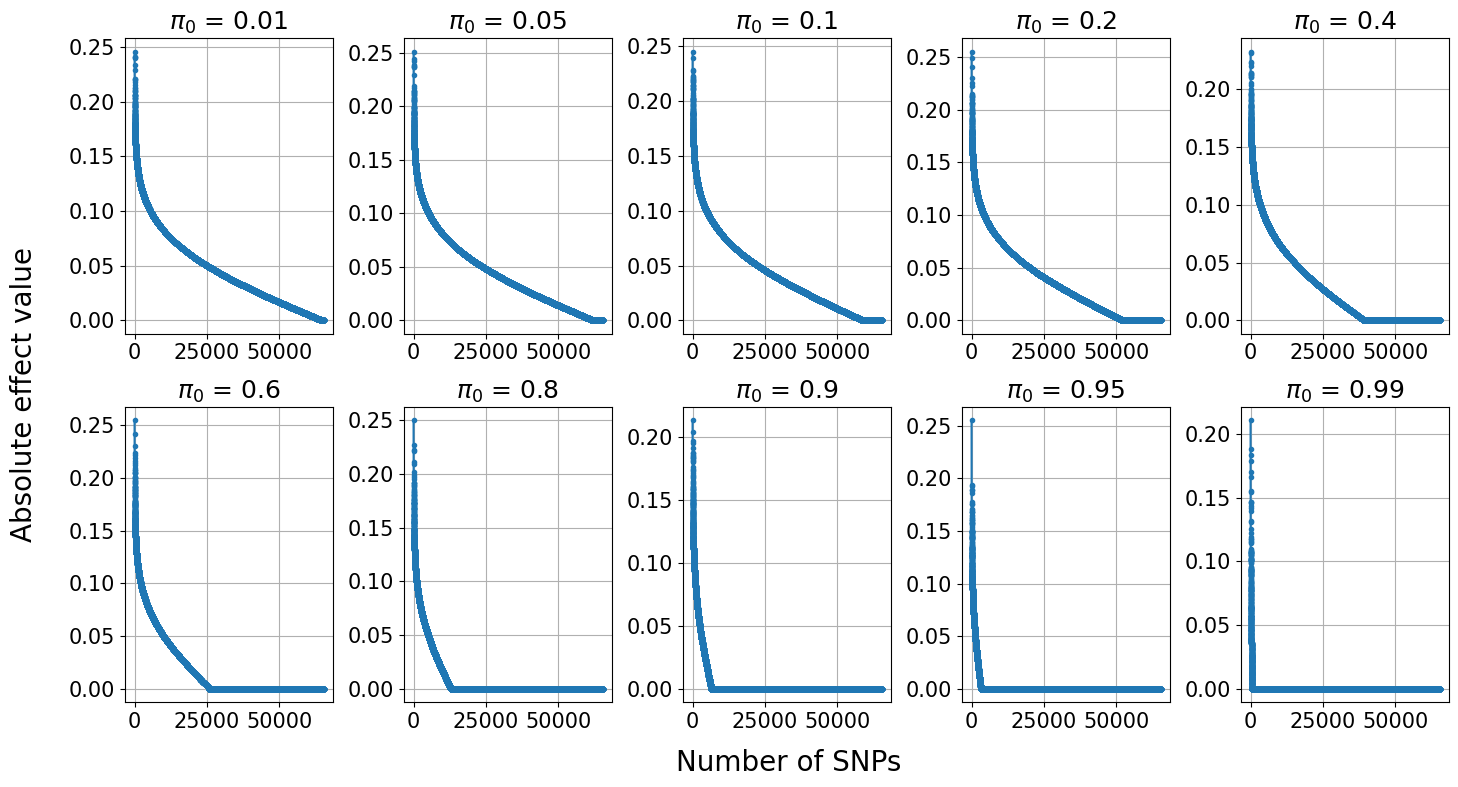

In [27]:
# Define parameters
pi_vec = np.array([0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99])
dset = "70k"

# Load the data
effects = []
for i in range(1, 11):
    file_path = f"c:/Users/gard_/Documents/MasterThesis/Code/Data/Phenotypes/{dset}/Sim_effect_{dset}_arch_{i}.csv"
    df = pd.read_csv(file_path)
    effects.append(df)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()  # Ensure it's a 1D array of Axes objects

# Adjust font sizes
title_fontsize = 18
label_fontsize = 20
tick_fontsize = 15

for i, df in enumerate(effects):
    effects_values = df.iloc[:, 0].abs().sort_values(ascending=False)

    # Ensure the axis exists before plotting
    if i < len(axes):
        axes[i].plot(effects_values.values, marker='o', linestyle='-', markersize=3)
        axes[i].set_title(r"$\pi_0$ = " + f"{pi_vec[i]}", fontsize=title_fontsize)
    
        # Remove only the x-axis label from the top row but keep the numbers
        if i < 5:
            axes[i].set_xlabel("")
    
        # Remove only the y-axis label from all but the leftmost column, but keep the numbers
        if i % 5 != 0:
            axes[i].set_ylabel("")
    
        axes[i].tick_params(axis='both', labelsize=tick_fontsize)
        axes[i].grid(True)

# Add common x-axis label
fig.text(0.55, 0.04, "Number of SNPs", ha='center', va='center', fontsize=label_fontsize)

# Add common y-axis label
fig.text(0.04, 0.5, "Absolute effect value", ha='center', va='center', rotation='vertical', fontsize=label_fontsize)

plt.tight_layout(rect=[0.06, 0.06, 1, 1])  # Adjust layout to prevent overlap
plt.draw()
plt.savefig("C:/Users/gard_/Documents/MasterThesis/Code/Figures/DescendingEffects_70k.png", dpi=300)
plt.show()

Here we plot all the (absolute) effect sizes that are over $0.15$. The pattern should show that there are fewer and fewer effect sizes, with some random noise also.

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gard_\AppData\Local\Temp\ipykernel_122292\174536848.py:21: SyntaxWarning: invalid escape sequence '\p'
  axes[i].set_title(f"$\pi_0$ = {pi_vec[i]}", fontsize=title_fontsize)


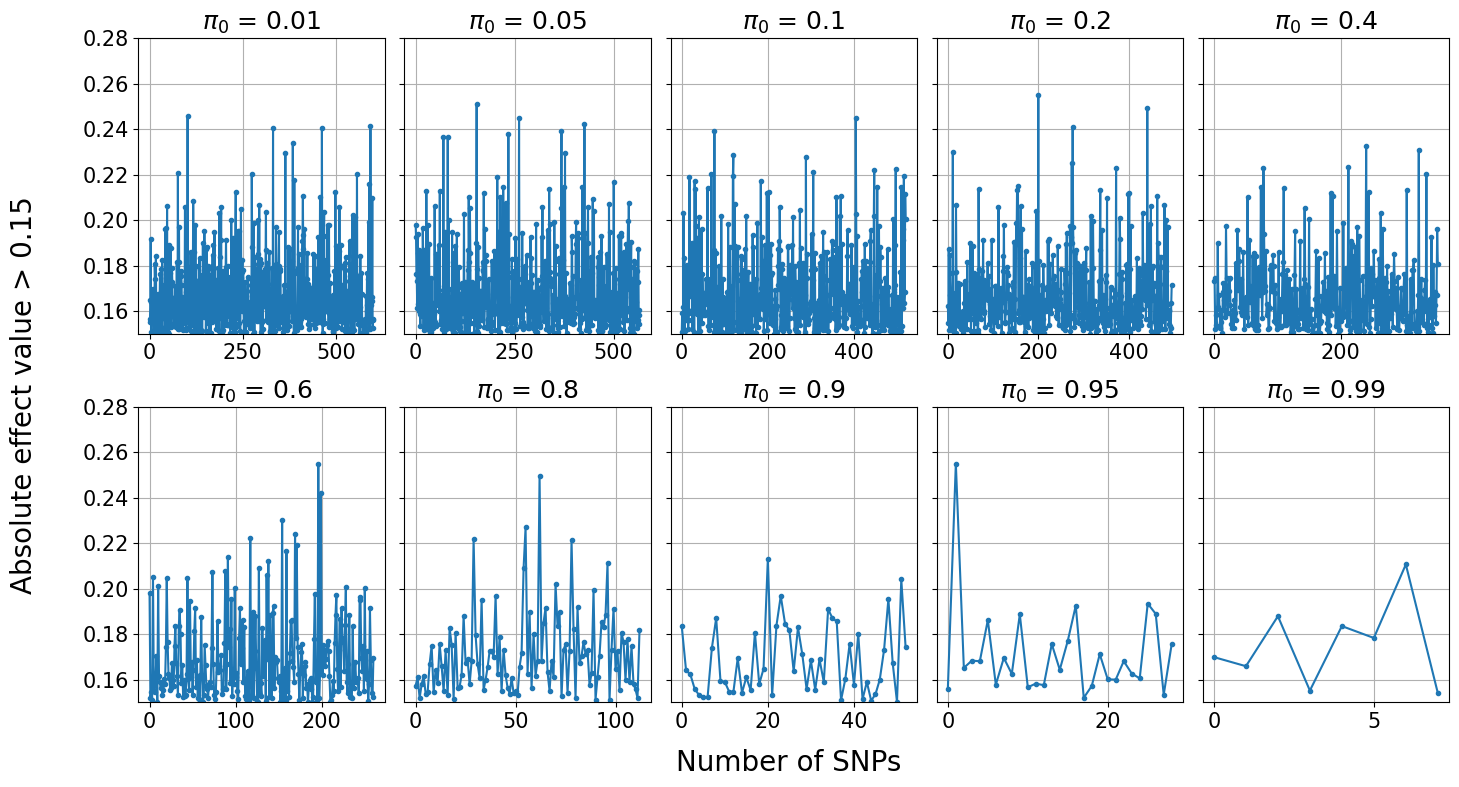

In [29]:
# Load the data
effects = []
for i in range(1, 11):
    file_path = f"c:/Users/gard_/Documents/MasterThesis/Code/Data/Phenotypes/{dset}/Sim_effect_{dset}_arch_{i}.csv"
    df = pd.read_csv(file_path)
    effects.append(df)

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

# Adjust font sizes
title_fontsize = 18
label_fontsize = 20
tick_fontsize = 15

for i, df in enumerate(effects):
    effects_values = df.iloc[:, 0].abs()
    filtered_values = effects_values[effects_values > 0.15]
    axes[i].plot(filtered_values.values, marker='o', linestyle='-', markersize=3)
    axes[i].set_title(f"$\pi_0$ = {pi_vec[i]}", fontsize=title_fontsize)
    axes[i].set_ylim(0.15, 0.28)

    # Remove individual x-axis label but keep the tick labels (numbers)
    if i < 5:
        axes[i].set_xlabel("")

    # Remove y-axis label from all except the leftmost column
    if i % 5 != 0:
        axes[i].set_yticklabels([])

    axes[i].tick_params(axis='both', labelsize=tick_fontsize)
    axes[i].grid(True)

# Add common x-axis label
fig.text(0.55, 0.04, "Number of SNPs", ha='center', va='center', fontsize=label_fontsize)

# Add common y-axis label
fig.text(0.04, 0.5, "Absolute effect value > 0.15", ha='center', va='center', rotation='vertical', fontsize=label_fontsize)

plt.tight_layout(rect=[0.06, 0.06, 1, 1])  # Adjust layout to prevent overlap
plt.draw()
plt.savefig("C:/Users/gard_/Documents/MasterThesis/Code/Figures/Effects_70k.png", dpi=300)
plt.show()